In [2]:
# Data cleaning
# EDA
# Text preprocessing
# Model building
# Evaluation
# Improvement
# Website 
# Depoly

In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

In [7]:
# Data Cleaning

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
## Non null values - v1 , v2  
## we can remove cells 2,3,4 (many missing values)

In [10]:
df = df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

In [11]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.rename(columns={'v1':'target','v2':'input-data'} , inplace=True)

In [13]:
df.head()

,target,input-data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df.sample(5)

,target,input-data
1931,ham,What pa tell me.. I went to bath:-)
2063,spam,"URGENT! Your mobile No *********** WON a å£2,0..."
4941,ham,"I'm eatin now lor, but goin back to work soon...."
4897,ham,Oh for fuck's sake she's in like tallahassee
3745,ham,I'm not. She lip synced with shangela.


In [15]:
import sklearn
from sklearn.preprocessing import LabelEncoder
print("scikit-learn is working!")

scikit-learn is working!


In [16]:
encoder = LabelEncoder()

In [17]:
df["target"] = encoder.fit_transform(df.target)

In [18]:
df.head()

,target,input-data
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
# check for missing values
df.isnull().sum()

target        0
input-data    0
dtype: int64

In [20]:
#check for duplicates
df.duplicated().sum()

np.int64(403)

In [21]:
# drop duplicates
df = df.drop_duplicates(keep='first')

In [22]:
df.head()

,target,input-data
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
df.duplicated().sum()

np.int64(0)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   target      5169 non-null   int64 
 1   input-data  5169 non-null   object
dtypes: int64(1), object(1)
memory usage: 121.1+ KB


# EDA (Explorary data analysis)

In [25]:
df.head()

,target,input-data
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [26]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [27]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x7f7a020163f0>,
 [Text(-1.014499732282844, 0.4251944181172162, 'Notspem'),
  Text(1.0144998708287172, -0.42519408755122207, 'spem')],
 [Text(-0.5533634903360967, 0.2319242280639361, '87.37'),
  Text(0.553363565906573, -0.231924047755212, '12.63')])

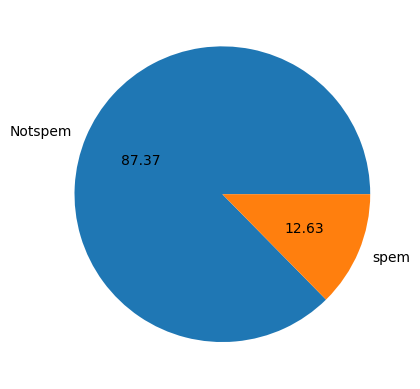

In [28]:
plt.pie(df['target'].value_counts(), labels=['Notspem','spem'],autopct="%0.2f")

In [29]:
import nltk
import re

In [30]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/ashok/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [31]:
df['num_char'] = df['input-data'].apply(len)

In [32]:
df.head()

,target,input-data,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [33]:
df['num_words'] = df['input-data'].apply(lambda x: len(re.findall(r'\b\w+\b', x)))

# This is a method to remove all the special characters from the text and split the text into words

In [34]:
import spacy
nlp = spacy.load("en_core_web_sm")
df['num_words'] = df['input-data'].apply(lambda x: len([token.text for token in nlp(x)]))
df.head()

,target,input-data,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,31
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [35]:
import spacy

# Load spaCy's English language model
nlp = spacy.load("en_core_web_sm")
# df['sent_words'] = df['input-data'].apply(lambda x: len([token for token in nlp(x) if not token.is_space]))
def count_tokens(text):
    doc = nlp(text)

    return  len(list(doc.sents))

df['num_sent'] = df['input-data'].apply(count_tokens)

df.head()



,target,input-data,num_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,3
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,31,2
3,0,U dun say so early hor... U c already then say...,49,13,2
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [36]:
df[['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.339911,2.100987
std,58.236293,13.175170,1.456628
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,2.000000
75%,117.000000,26.000000,3.000000
max,910.000000,196.000000,27.000000


In [37]:
df[df["target"]==0][['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.919176,1.961913
std,56.358207,13.224373,1.400953
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,2.000000
75%,90.000000,22.000000,2.000000
max,910.000000,196.000000,27.000000


In [38]:
#spem
df[df["target"]==1][['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,28.165391,3.062787
std,30.137753,7.361204,1.471835
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,33.000000,4.000000
max,224.000000,49.000000,9.000000


In [39]:
import seaborn as sns

<Axes: xlabel='num_char', ylabel='Count'>

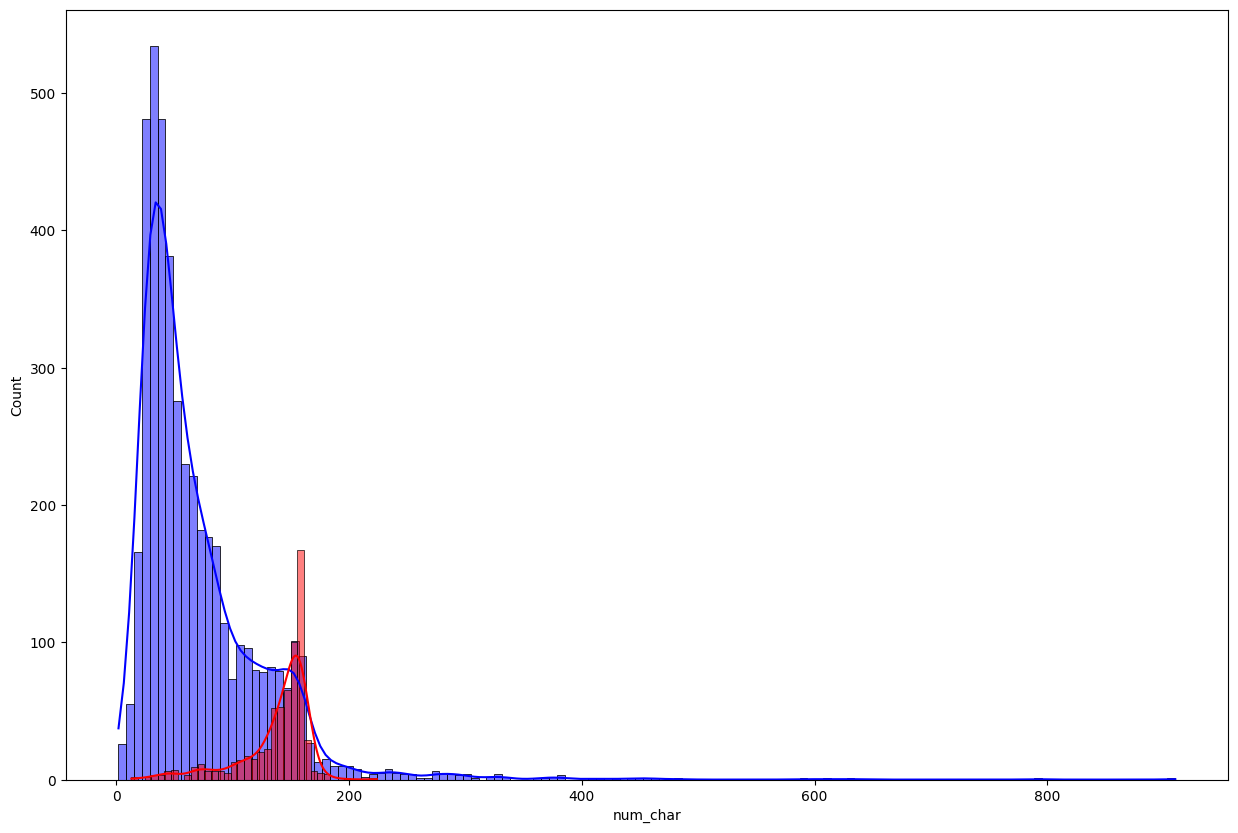

In [40]:
plt.figure(figsize=(15,10))
sns.histplot(df[df['target']==0]['num_char'],color='blue',label='Not Spam',kde=True)
sns.histplot(df[df['target']==1]['num_char'],color='red',label='Spam',kde=True)

<Axes: xlabel='num_words', ylabel='Count'>

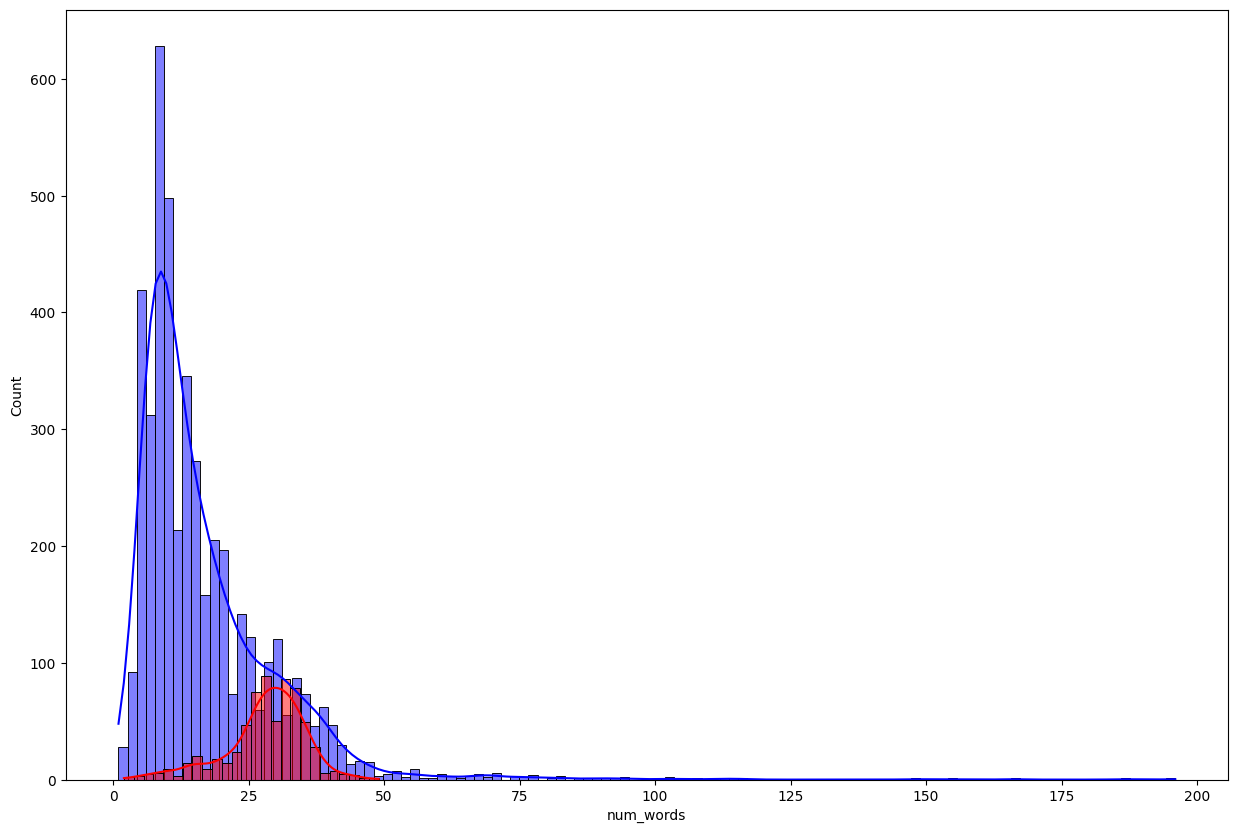

In [41]:
plt.figure(figsize=(15,10))
sns.histplot(df[df['target']==0]['num_words'],color='blue',label='Not Spam',kde=True)
sns.histplot(df[df['target']==1]['num_words'],color='red',label='Spam',kde=True)

<Axes: xlabel='num_sent', ylabel='Count'>

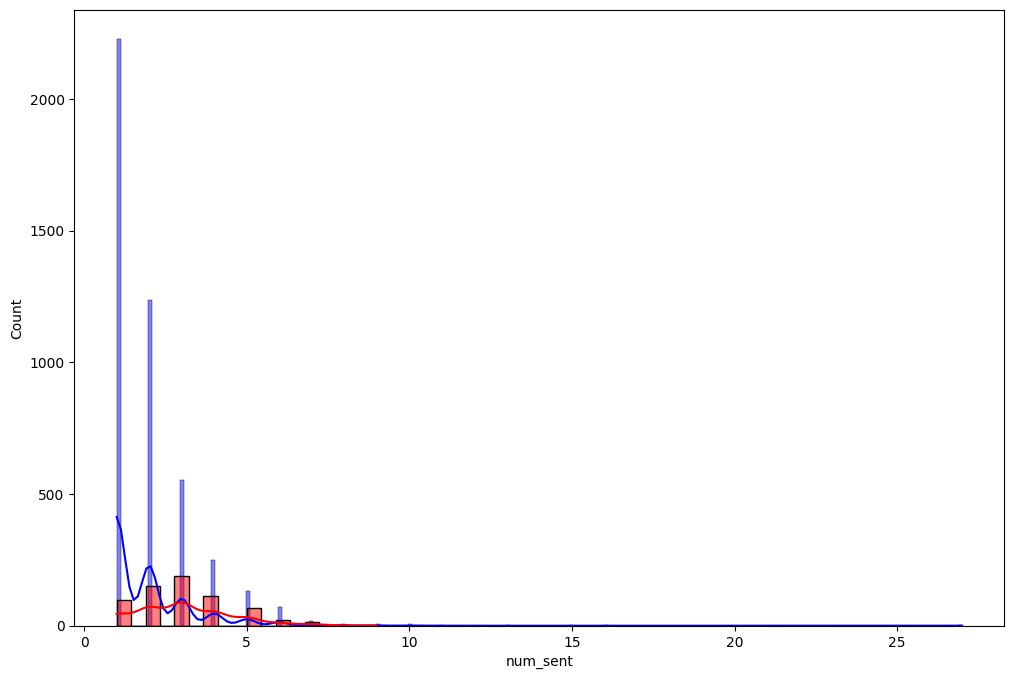

In [42]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_sent'],color='blue',label='Not Spam',kde=True)
sns.histplot(df[df['target']==1]['num_sent'],color='red',label='Spam',kde=True)

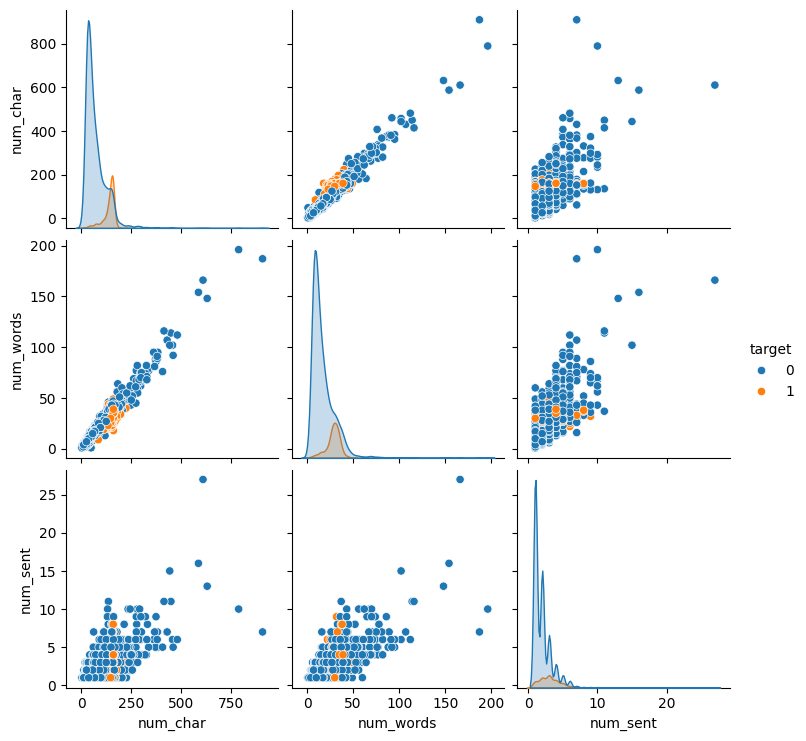

In [43]:
sns.pairplot(df[['num_char','num_words','num_sent','target']],hue='target')

In [44]:
sns.heatmap(df.corr())

ValueError: could not convert string to float: 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   target      5169 non-null   int64 
 1   input-data  5169 non-null   object
 2   num_char    5169 non-null   int64 
 3   num_words   5169 non-null   int64 
 4   num_sent    5169 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 242.3+ KB


<Axes: >

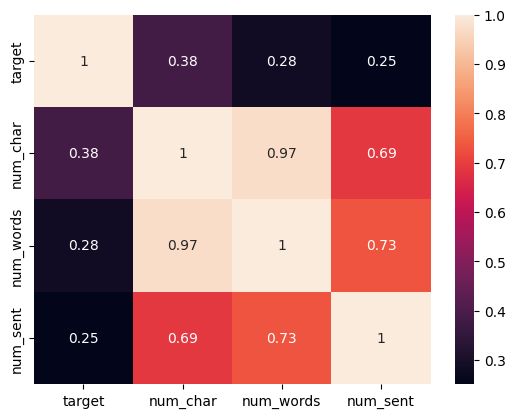

In [ ]:
df_int = df.select_dtypes(include=['number'])
sns.heatmap(df_int.corr(),annot=True)

## Data preprocessing

In [ ]:
# lower case 
# tokenization
# remove special characters
# remove stop words
# remove punctuations
# remove numbers
# remove empty strings
# remove extra spaces
# stemming

In [45]:
df.head()

,target,input-data,num_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,3
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,31,2
3,0,U dun say so early hor... U c already then say...,49,13,2
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [88]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /home/ashok/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/ashok/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /home/ashok/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [81]:
import spacy
import re
import string
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
stopwords = nlp.Defaults.stop_words # set type
nlp = spacy.load("en_core_web_sm")
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [99]:
def transform_text(text):
    text = text.lower()  
    text = text.translate(str.maketrans("", "", string.punctuation))
    text = re.sub(r'\d+', '', text)  # Remove numbers
    tokens = [token.text for token in nlp(text)]  # Tokenize text using spaCy
    tokens = [token for token in tokens if token.isalpha()]  # Remove non-alph
    tokens = [token for token in tokens if token not in stopwords] # Remove stopwords
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    lemmas = [lemmatizer.lemmatize(token, pos='n') for token in stemmed_tokens]
    # lemmas = list(set(lemmas))
    unique_list = []
    seen = set()

    for item in lemmas:
        if item not in seen:
            unique_list.append(item)
            seen.add(item)
    return " ".join(unique_list)
   

In [102]:
df['cleaned_text'] = df['input-data'].apply(transform_text)
df.head()

,target,input-data,num_char,num_words,num_sent,cleaned_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,3,jurong point crazi avail bugi n great world la...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,31,2,free entri wkli comp win fa cup final tkt st t...
3,0,U dun say so early hor... U c already then say...,49,13,2,u dun earli hor c
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah nt think goe usf live


In [116]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [122]:
spem_wc = wc.generate(' '.join(df[df['target']==1]['cleaned_text'].str.cat(sep=" ")))

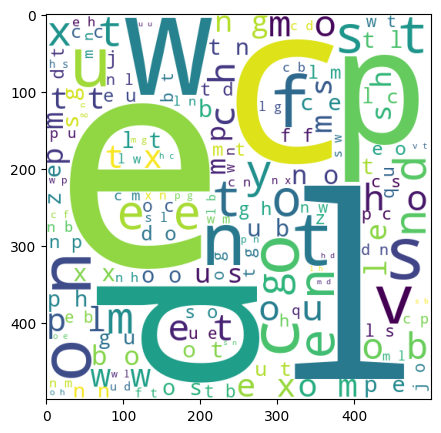

In [125]:
plt.figure(figsize=(5,5))
plt.imshow(spem_wc)